In [1]:
print("Hello World")

import os
print(os.getcwd())

Hello World
/content


**3월 10일 수요일
2주차**

# 2장

# 설정

파이썬 버전을 확정하고 관련된 패키지를 임포트한다.

In [2]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 깔금한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# 그림을 그리기 위해 새로운 함수 생성
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 데이터 가져오기

파일 만들기

https://raw.githubusercontent.com/rickiepark/handson-ml2/master/ 에 있는 정보를 파일에 저장

In [3]:
import os
import tarfile #리눅스의 파일집 압축해제해서 가져오기 위해
import urllib.request

#주소를 입력받음
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
#파이썬에서 알아서 주소 세팅
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

#서버(housing_url)에서 가져와서 함수(housing_path)에 저장
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    # 인터넷주소에서 다운받음
    urllib.request.urlretrieve(housing_url, tgz_path)
    #파일 오픈 -> 새로운 객체에 저장 ,tgz_path에서 사용하는 내용을  housing_tgz에 저장
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path) #실제 데이터를 저장
    housing_tgz.close() 

파일 저장 소스 실행

In [4]:
fetch_housing_data()

객체 형태로 바꿈

In [5]:
#pandas를 사용해서 엑셀 파일에 있는 데이터를 파이썬이 읽을 수 있는 형태로 바꿈
#as pd => pandas 모듈을 pd로 지정pandas를 사용해서 엑셀 파일에 있는 데이터를 파이썬이 읽을 수 있는 형태로 바꿈
#as pd = pandas 모듈을 pd로 지정
import pandas as pd

#housing.csv 파일을 접근한다
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

#데이터 프레임 객체를 반환

In [6]:
#데이터의 형태(특성)를 확인하는 코드
housing = load_housing_data()
#확인(조회)하는 헤드
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
#또다른 형태로 확인할 수 있는 코드
housing.info()

#dtypes = 데이터 타입
#object = 객체

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
#'ocean_proximity'에 해당하는 데이터만 확인하겠다!
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
#숫자형 특성의 용약 정보
#ocean_proximity는 객체이므로 학인X
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


그림 저장: attribute_histogram_plots


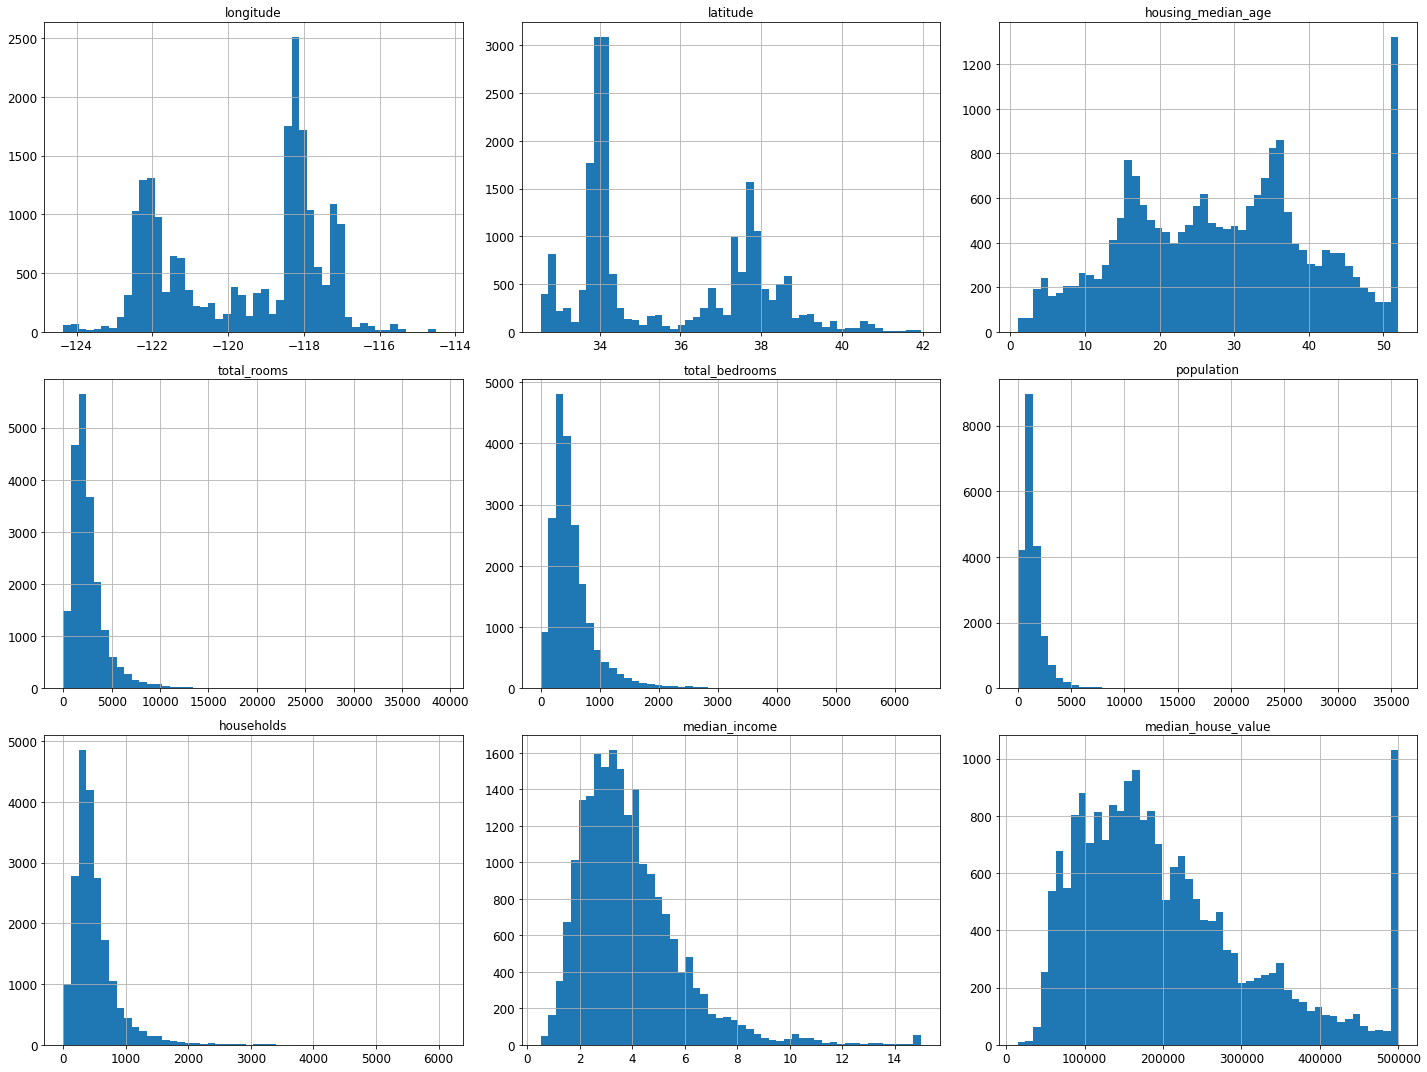

In [10]:
#주피터 노트북의 매직 명령 -> 노트북에서 그림으로 나타내기 위해서
#주피터 노트북에서만 사용하는 문법

%matplotlib inline 
import matplotlib.pyplot as plt
#50칸으로 나누고
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show() # 화면에 뿌리기

In [11]:
#노트북의 실행 결과가 동일하도록
np.random.seed(42)

In [12]:
import numpy as np

# 예시로 만든 것입니다. 실전에서는 사이킷런의 train_test_split()를 사용하세요.
# test_ratio = 테스트 비율 = 데이터셋의 20% wjdeh
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    #테스트셋의 개수(데이터 개수*test_ratio)
    test_set_size = int(len(data) * test_ratio)
    #0부터 test_set_size까지 이덱스 배열을 짤라서 리스트업
    test_indices = shuffled_indices[:test_set_size]
    #test_set_size 부터 끝까지 인덱스 배열을 짤라서 리스트업
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [14]:
len(test_set)

4128

In [15]:
#20%이하 데이터
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [16]:
#20%초과하는 데이터
train_set.head

<bound method NDFrame.head of        longitude  latitude  ...  median_house_value  ocean_proximity
14196    -117.03     32.71  ...            103000.0       NEAR OCEAN
8267     -118.16     33.77  ...            382100.0       NEAR OCEAN
17445    -120.48     34.66  ...            172600.0       NEAR OCEAN
14265    -117.11     32.69  ...             93400.0       NEAR OCEAN
2271     -119.80     36.78  ...             96500.0           INLAND
...          ...       ...  ...                 ...              ...
11284    -117.96     33.78  ...            229200.0        <1H OCEAN
11964    -117.43     34.02  ...             97800.0           INLAND
5390     -118.38     34.03  ...            222100.0        <1H OCEAN
860      -121.96     37.58  ...            283500.0        <1H OCEAN
15795    -122.42     37.77  ...            325000.0         NEAR BAY

[16512 rows x 10 columns]>

In [17]:
#[25]함수를 간단하게 sklearn을 이용해서 구현
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# 데이터 이해를 위한 탐색과 시각화

In [18]:
housing = train_set.copy()
#copy를 안하면 housing에 변화를 주면 train_set도 변함
#파이썬은 주소를 가지고 있어서 같다라고 하면 주소까지 같아진다.
#그럼 하나가 변하면 다른 하나도 변함
#housing이라는 객체를 새로 만듦

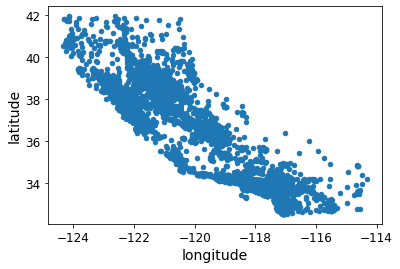

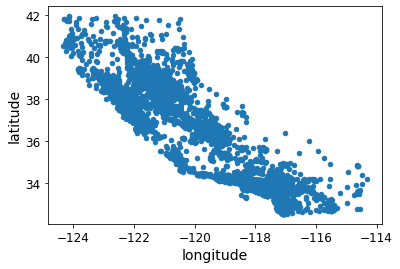

In [19]:
#그림 객체 반환그림 객체 반환
housing.plot(kind='scatter', x="longitude", y="latitude")
housing.plot(kind='scatter', x="longitude", y="latitude")

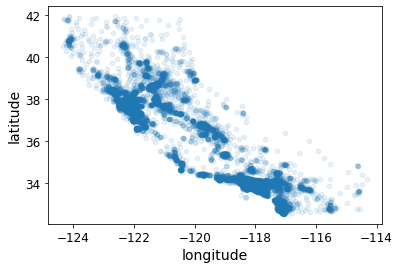

In [20]:
#alpha = 밀집한 부분이 잘 보일수 있도록 투명도 설정
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

그림 저장: housing_prices_scatterplot


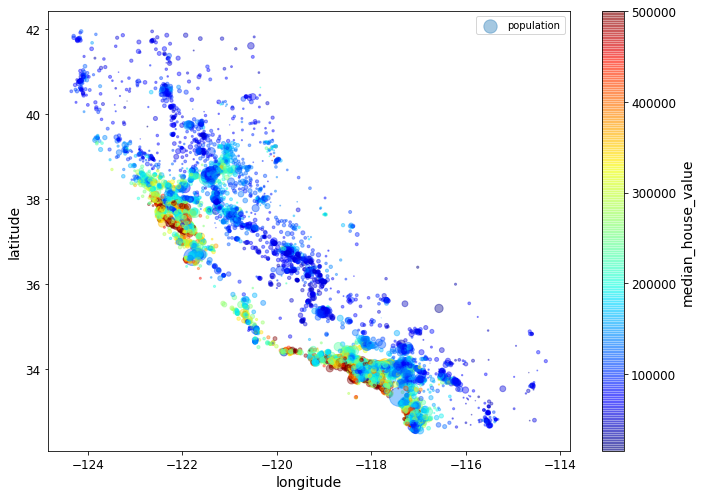

In [21]:
#색 표시
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

그림 저장: housing_prices_scatterplot


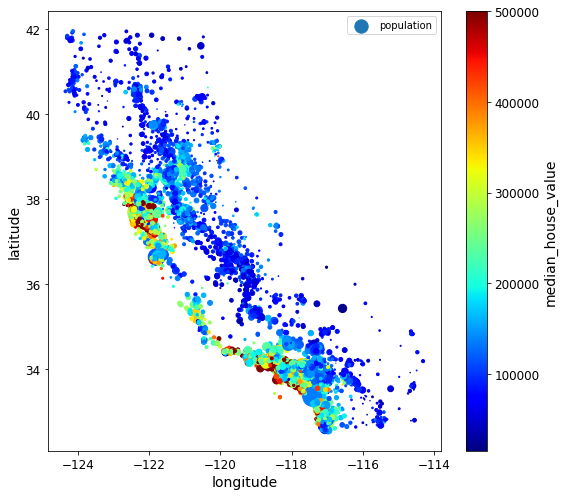

In [22]:
#색 표시
#alpha = 구분할 수 있는 선명도(값이 클수록 투명도 희미해짐)
#s = 원의 반지름 = 구역의 인구
#c = 색상 = 가격
#label = ?
#figsize = 그래프 사이즈
#colorbar = 옆에 색 그래프 존재 유무
#sharex = x값. y값 존재 유무
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=1,
             s=housing["population"]/100, label="population", figsize=(8,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

그림 저장: scatter_matrix_plot


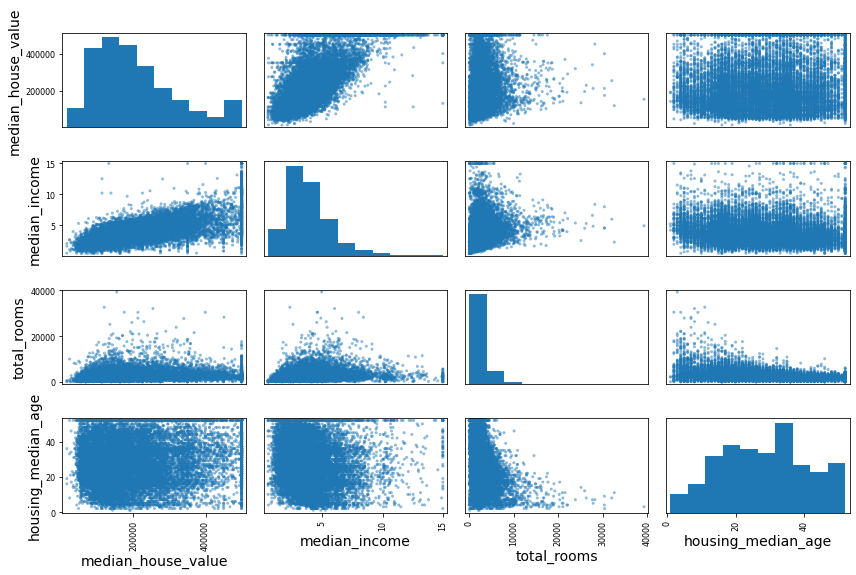

In [23]:
#상관관계 표시
#점으로 찍히는 그래프의 변화 => 상관관계가 있다.

#From A import B => A에 있는 B를 가져오겠다.
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

그림 저장: income_vs_house_value_scatterplot


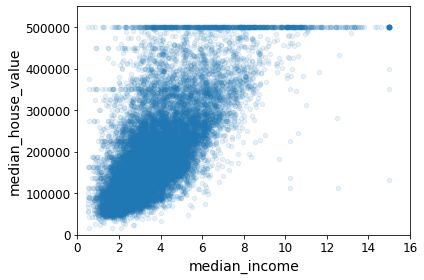

In [24]:
#중간 소득 대 중간 주택 가격 비교 & 투명도 차이로 구별
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
#구간 간격 조정
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

**3월 17일 수요일
3주차**

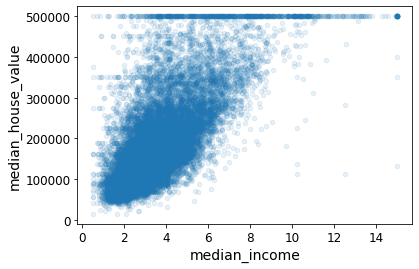

In [25]:
## alpha 옵션으로 데이터 포인트가 밀집된 영역을 잘 보여줌
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [26]:
## 표준 상관계수
## 상관 관계의 범위는 -1부터 1까지
## 1에 가까우면 강한 양의 상관관계를 가진다.
## corr() 메서드 이용
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

In [27]:
#객체사이에서도 사칙연산이 가능하다!!
#더할 때는 총 개수가 같아야한다. 또 계산은 같은 인덱스에서만 가능하다~!!
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [28]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690647
rooms_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
bedrooms_per_room          -0.257419
Name: median_house_value, dtype: float64

# 머신러닝 알고리즘을 위한 데이터 준비

object를 숫자로 바꿔줘야한다.


 train_set과 test_set과 잘 섞이지 않아 잘 시행 X
 bedroom부분이 누락됨됨

In [29]:
np.random.seed(789)
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    #테스트셋의 개수(데이터 개수*test_ratio)
    test_set_size = int(len(data) * test_ratio)
    #0부터 test_set_size까지 이덱스 배열을 짤라서 리스트업
    test_indices = shuffled_indices[:test_set_size]
    #test_set_size 부터 끝까지 인덱스 배열을 짤라서 리스트업
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [30]:
housing = load_housing_data()

In [31]:
train_set, test_set = split_train_test(housing, 0.2)

In [32]:
# 훈련 세트를 위해 레이블 삭제
housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

In [33]:
housing_labels.head()

851      214700.0
11666    209300.0
3877     236100.0
2573      96100.0
3330     112500.0
Name: median_house_value, dtype: float64

In [34]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16879,-122.39,37.60,34.0,707.0,NaN,381.0,156.0,4.3750,NEAR OCEAN
5665,-118.29,33.73,30.0,3161.0,NaN,1865.0,771.0,2.7139,NEAR OCEAN
19932,-119.33,36.30,11.0,3045.0,NaN,1563.0,516.0,5.4337,INLAND
13925,-114.59,34.83,41.0,812.0,NaN,375.0,158.0,1.7083,INLAND
13311,-117.61,34.08,12.0,4427.0,NaN,2400.0,843.0,4.7147,INLAND


** 데이터 정제 **
* 해당 구역을 제거한다.
* 전체 특성을 삭제한다.
* 어떤 값으로 채운다.

=> 데이터프레임의 dropna(), drop(), fillna() 메서드 이용

In [35]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # 옵션 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [36]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # 옵션 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
16879,-122.39,37.60,34.0,707.0,381.0,156.0,4.3750,NEAR OCEAN
5665,-118.29,33.73,30.0,3161.0,1865.0,771.0,2.7139,NEAR OCEAN
19932,-119.33,36.30,11.0,3045.0,1563.0,516.0,5.4337,INLAND
13925,-114.59,34.83,41.0,812.0,375.0,158.0,1.7083,INLAND
13311,-117.61,34.08,12.0,4427.0,2400.0,843.0,4.7147,INLAND


In [37]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # 옵션 3

In [38]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16879,-122.39,37.60,34.0,707.0,432.0,381.0,156.0,4.3750,NEAR OCEAN
5665,-118.29,33.73,30.0,3161.0,432.0,1865.0,771.0,2.7139,NEAR OCEAN
19932,-119.33,36.30,11.0,3045.0,432.0,1563.0,516.0,5.4337,INLAND
13925,-114.59,34.83,41.0,812.0,432.0,375.0,158.0,1.7083,INLAND
13311,-117.61,34.08,12.0,4427.0,432.0,2400.0,843.0,4.7147,INLAND


In [39]:
median

432.0

In [40]:
## SimpleImputer = 누락된 값을 손쉽게 다루도록 해준다.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [41]:
## 중간값이 수치형 특성에서만 계산될 수 있기 때문에 텍스트 특성인 ocean_proximity를 제외한 데이터 복사본 생성
housing_num = housing.drop("ocean_proximity", axis=1)

In [42]:
## fit() 메서드를 사용해 훈련 데이터에 적용
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [43]:
#배열로 저장됨
imputer.statistics_

array([-118.5    ,   34.26   ,   29.     , 2118.     ,  432.     ,
       1164.     ,  407.     ,    3.54355])

In [44]:
## imputer객체를 사용해 훈련 세트에서 누락된 값을 학습한 중간값으로 바꿀 수 있다.
X = imputer.transform(housing_num)

In [45]:
#판다스 객체로서 새로 생성
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [46]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
851,-122.03,37.60,24.0,2077.0,383.0,1488.0,389.0,4.5721
11666,-118.01,33.85,29.0,2064.0,447.0,1265.0,400.0,3.8864
3877,-118.50,34.21,36.0,1254.0,229.0,629.0,245.0,4.9643
2573,-124.11,40.81,23.0,959.0,212.0,425.0,175.0,2.5536
3330,-122.48,38.90,10.0,304.0,63.0,161.0,61.0,2.1964


In [47]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
16879,-122.39,37.60,34.0,707.0,432.0,381.0,156.0,4.3750
5665,-118.29,33.73,30.0,3161.0,432.0,1865.0,771.0,2.7139
19932,-119.33,36.30,11.0,3045.0,432.0,1563.0,516.0,5.4337
13925,-114.59,34.83,41.0,812.0,432.0,375.0,158.0,1.7083
13311,-117.61,34.08,12.0,4427.0,432.0,2400.0,843.0,4.7147


In [48]:
imputer.strategy

'median'

In [49]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
851,-122.03,37.60,24.0,2077.0,383.0,1488.0,389.0,4.5721
11666,-118.01,33.85,29.0,2064.0,447.0,1265.0,400.0,3.8864
3877,-118.50,34.21,36.0,1254.0,229.0,629.0,245.0,4.9643
2573,-124.11,40.81,23.0,959.0,212.0,425.0,175.0,2.5536
3330,-122.48,38.90,10.0,304.0,63.0,161.0,61.0,2.1964


In [50]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
851,NEAR BAY
11666,<1H OCEAN
3877,<1H OCEAN
2573,NEAR OCEAN
3330,INLAND
9659,INLAND
17286,NEAR OCEAN
120,NEAR BAY
1488,NEAR BAY
11219,<1H OCEAN


In [51]:
#form A import B => A에서 B를 가져온다
#OrdinalEncoder = ocean_proximity를 숫자로 변환
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
#fit = 분석 . transform = 변환
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]
from sklearn.preprocessing import OrdinalEncoder


In [52]:
#Encoder 카테고리
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [53]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [54]:
#1hot => x, y, z ... 축으로 분류(여러 축으로)
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [55]:
#cat의 카테고리
cat_encoder.categories_

#결과는 우연으로 똑같이

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [56]:
## 조합 특성을 추가하는 간단한 변환기
from sklearn.base import BaseEstimator, TransformerMixin

# 열 인덱스
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # *args 또는 **kargs 없음
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # 아무것도 하지 않습니다
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.to_numpy())

In [57]:

col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # 열 인덱스 구하기

In [58]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
851,-122.03,37.6,24,2077,383,1488,389,4.5721,NEAR BAY,5.33933,3.82519
11666,-118.01,33.85,29,2064,447,1265,400,3.8864,<1H OCEAN,5.16,3.1625
3877,-118.5,34.21,36,1254,229,629,245,4.9643,<1H OCEAN,5.11837,2.56735
2573,-124.11,40.81,23,959,212,425,175,2.5536,NEAR OCEAN,5.48,2.42857
3330,-122.48,38.9,10,304,63,161,61,2.1964,INLAND,4.98361,2.63934


In [59]:
## Pipeline (-> 사이킷런 클래스) = 연속된 변환을 순서대로 처리할 수 있도록 도와줌
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])
## 파이프라인의 fit()메서드를 호출하면 모든 변환기의 fit_transform() 메서드를 순서대로 호출
## 마지막 단계에서는 fit() 메서드만 호출
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [60]:
housing_num_tr

array([[-1.22457025,  0.91883375, -0.36978199, ..., -0.03663245,
         0.06883982, -0.44128976],
       [ 0.77975225, -0.83683722,  0.02771295, ..., -0.10752009,
         0.00821971,  0.04211812],
       [ 0.53544428, -0.66829281,  0.58420585, ..., -0.12397698,
        -0.04622217, -0.46811225],
       ...,
       [-0.94037527,  1.36828552,  1.85618964, ..., -0.2725341 ,
        -0.09167505, -0.0179651 ],
       [-1.20462674,  0.75965291,  0.02771295, ...,  1.02209413,
        -0.01608941, -1.1943049 ],
       [ 0.63017594, -0.74320144,  0.50470687, ..., -0.49984832,
         0.07446617,  0.54447575]])

In [61]:
## ColumnTransformer = 하나의 변환기로 각 열마다 적절한 변환을 적용, 모든 열 처리 가능
## => 사이킷런 2.0 버전에서 추가된 기능
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

## num_pipeline = 수치형 열 변환할 때 사용
## OneHotEncoder = 범주형 열 변환할 때 사용
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [62]:
housing_prepared

array([[-1.22457025,  0.91883375, -0.36978199, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.77975225, -0.83683722,  0.02771295, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.53544428, -0.66829281,  0.58420585, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.94037527,  1.36828552,  1.85618964, ...,  0.        ,
         0.        ,  0.        ],
       [-1.20462674,  0.75965291,  0.02771295, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.63017594, -0.74320144,  0.50470687, ...,  0.        ,
         0.        ,  0.        ]])

In [63]:
housing_prepared.shape

(16512, 16)

**3월 24일 수요일
4주차**

# 모델 선택과 훈련

In [66]:
# 선형회귀 모델 훈련
# LineraRegression = 사이킷런에 있는 클래스

from sklearn.linear_model import LinearRegression
# 클래스를 객체로 변환해줘야 fit()메서드를 사용할 수 있음
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
# 훈련 세트에 있는 샘플에 대해 적용
some_data = housing.iloc[:5] #0~4까지
some_labels = housing_labels.iloc[:5]
# some_data를 full_pipeline 통과
some_data_prepared = full_pipeline.transform(some_data)
# 데이터 예측값
print("예측:", lin_reg.predict(some_data_prepared))
print("레이블:", list(some_labels))

예측: [232433.25594836 216202.27094272 268582.12316139 152442.80587052
  81912.78283468]
레이블: [214700.0, 209300.0, 236100.0, 96100.0, 112500.0]


In [74]:
# mean_squared_error = 제곱평균오차
from sklearn.metrics import mean_squared_error

# 모든 데이터의 예측값
housing_predictions = lin_reg.predict(housing_prepared) 
# 데이터의 뺄셈의 제곱의 평균
lin_mse = mean_squared_error(housing_labels, housing_predictions)
# rms 구하기 = lin_mse 제곱근 구하는 함수
lin_rmse = np.sqrt(lin_mse)

print(lin_mse)
lin_rmse

4653043898.234898


68213.22377834738

In [81]:
from sklearn.metrics import mean_squared_error

# 뽑은 데이터의 예측값
some_predictions = lin_reg.predict(some_data_prepared) 
# 각 데이터 뺄셈의 제곱의 평균
some_lin_mse = mean_squared_error(some_labels, some_predictions)
# rms 구하기 => lin_mse 제곱근 구하는 함수
some_lin_rmse = np.sqrt(some_lin_mse)

print(some_lin_mse)
some_lin_rmse

1105457532.6099777


33248.42150553884

In [86]:
# DecisionTreeRegressor 훈련
# -> 강력하고 데이터에서 복잡한 비선형 관계를 찾을 수 있다.
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [83]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [119]:
# 사이킷런의 k-겹 교차 겁증 기능 사용
from sklearn.model_selection import cross_val_score

# cv개수 만큼 저장됨
# neg_mean_squared_error = neg는 음수를 붙인 형태
# rms는 값이 작을수록 좋은 결과(비용함수)
# scoring은 값이 높을수록 좋은 함수(효용함수)

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
# scoring은 음수로 나오기 때문에 계산전 부호를 반대로 바꿔줌
tree_rmse_scores = np.sqrt(-scores)

In [88]:
# 결과
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준 편차:", scores.std())

display_scores(tree_rmse_scores)

점수: [69860.34776598 70138.71935808 69920.70435539 70305.28428549
 68994.46922187 75701.91117924 72605.83770667 69786.8021538
 70300.59672989 73161.53804746]
평균: 71077.62108038769
표준 편차: 1974.0812574062109


In [89]:
# 비교를 위해 선형 회귀 모델의 점수 계산
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수: [68854.17619174 66633.60719241 67282.41806373 70823.75342858
 69865.43665126 71107.34985757 67571.26205744 67430.6423321
 67092.06115303 68874.57738805]
평균: 68553.52843159242
표준 편차: 1524.9234819558046


In [98]:
# 앙상블 학습 => 머신러닝 알고리즘의 성능을 극대화하는 방법중 하나 앙상블 학습 => 머신러닝 알고리즘의 성능을 극대화하는 방법중 하나
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

forest_rms_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

print(forest_rmse_scores)
print("mean : ", forest_rmse_scores.mean())
print("std : ", forest_rmse_scores.std())

[50918.46964287 49999.34663258 50745.2630061  49135.5961679
 49748.82208324 50253.97043037 50813.94375056 47045.94468948
 48657.91552657 50987.1142986 ]
mean :  49830.638622827515
std :  1189.600310549197


**파라미터와 하이퍼파라미터**


* 파라미터

: 데이터를 통해 측정이 가능한 값이며, 모델이 새로운 샘플을 예측할 때 요구하는 값이다.


* 하이퍼파라미터

: 모델이 아닌 학습 알고리즘 자체의 파라미터를 말한다.

성능을 최적화하거나 bias(편향)과 variance(분산) 사이의 균형을 맞출 때 알고리즘을 조절하기 위해 사용된다.

학습 전에 미리 지정되어 훈련하는 동안의 상수로 남게 되며, 파라미터와 다르게 주로 알고리즘 사용자에 의해 정해진다.

In [118]:
# 그리드 탐색
from sklearn.model_selection import GridSearchCV

# RandomForestRegressor에 대한 최적의 하이퍼파라미터 조합 탐색
# 하이퍼파라미터는 모델파라미터를 얻기 위해 훈련하는 방법
param_grid = [
    # 12(=3×4)개의 하이퍼파라미터 조합을 시도합니다.
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # bootstrap은 False로 하고 6(=2×3)개의 조합을 시도합니다.
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()


# 각각 다섯 번 모델을 훈련시킨다.(5-겹 교차 검증을 사용하기 때문에)
# 다섯 개의 폴드로 훈련하면 총 (12+6)*5=90번의 훈련이 일어납니다.
# param_grid = 파리미터의 조합
# train_score를 참으로 해야 값을 입력 받음

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [116]:
grid_search.best_params_
# 나온 결과 8과 30은 "탐색 범위의 최댓값"이다.
# 배열 개수의 최대값이 최대로 나왔기 때문에 계속 점수가 향상될 가능성이 있다.
# 그래서 다시 더 큰 값으로 다시 검색해야 한다.
# 만약 6이 최댓값이면 주변값 중 최대로 좋은 것이 6이었으므로  굳이 할 필요는 없다.


{'max_features': 8, 'n_estimators': 30}

In [115]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64387.207592433944 {'max_features': 2, 'n_estimators': 3}
54316.00094499846 {'max_features': 2, 'n_estimators': 10}
52300.549754968626 {'max_features': 2, 'n_estimators': 30}
59235.54715978365 {'max_features': 4, 'n_estimators': 3}
52571.16849165993 {'max_features': 4, 'n_estimators': 10}
49806.741775449176 {'max_features': 4, 'n_estimators': 30}
58029.54537886913 {'max_features': 6, 'n_estimators': 3}
51925.237943536755 {'max_features': 6, 'n_estimators': 10}
49949.681219267775 {'max_features': 6, 'n_estimators': 30}
58801.57098275657 {'max_features': 8, 'n_estimators': 3}
51652.33666432088 {'max_features': 8, 'n_estimators': 10}
49784.910326445024 {'max_features': 8, 'n_estimators': 30}
61532.42546101976 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53639.21165830462 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58487.73372561517 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52125.869343740385 {'bootstrap': False, 'max_features': 3, 'n_estimato

위 결과에 따라서 이 예에서는 max_features 하이퍼파라미터가 8, n_estimators 하이퍼파라미터가 30일 때 최적의 솔루션이다.

In [114]:
# RandomForestRegressor가 정확한 예측을 만들기 위한 각 특서의 상대적인 중요도 RandomForestRegressor가 정확한 예측을 만들기 위한 각 특서의 상대적인 중요도
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.38809712e-02, 7.16237918e-02, 4.03073266e-02, 1.49002509e-02,
       1.45493986e-02, 1.43369262e-02, 1.34174534e-02, 3.57711903e-01,
       6.47073227e-02, 1.11348467e-01, 5.28973826e-02, 5.67541806e-03,
       1.59149754e-01, 1.06187370e-04, 2.28804609e-03, 3.09940091e-03])

In [113]:
# 중요도 다음에 그에 대응하는 특성 이름 표시
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3577119026634986, 'median_income'),
 (0.15914975420330782, 'INLAND'),
 (0.11134846674223914, 'pop_per_hhold'),
 (0.07388097118034027, 'longitude'),
 (0.07162379183473416, 'latitude'),
 (0.06470732268536847, 'rooms_per_hhold'),
 (0.052897382649815375, 'bedrooms_per_room'),
 (0.040307326561922215, 'housing_median_age'),
 (0.014900250866962646, 'total_rooms'),
 (0.014549398560392042, 'total_bedrooms'),
 (0.01433692621014179, 'population'),
 (0.013417453409057594, 'households'),
 (0.005675418061242155, '<1H OCEAN'),
 (0.003099400909322214, 'NEAR OCEAN'),
 (0.0022880460920336088, 'NEAR BAY'),
 (0.00010618736962182316, 'ISLAND')]

In [122]:
# 최종 모델 평가
# 그리드 서치에서 찾은 베스트로 평가
final_model = grid_search.best_estimator_
# X는 입력값. Y는 출력값
X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()

# X는 전처리 과정을 통해서 입력
# 테스트 세트에서 훈련하면 안 되므로 fit/transform()이 아니라 transform()을 호출해야 한다.
X_test_prepared = full_pipeline.transform(X_test)
# Y는 입력값 X를 통해서 predict해서 출력
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

49556.36946707133

test_set => 분포 미포함
strat_teat_set => 분포 고려해서 균일하게 테스트
strat_test_set이 더 좋은 테스트